# Mini-Project 1: Machine Learning 101

Christian Martel (260867191)

Luka Loignon (260871296)

Marie Guertin (260870552)

# PART II: Letter Recognition Dataset

Dataset of character image features. Goal is to identify the letter.
https://archive.ics.uci.edu/ml/datasets/Letter+Recognition?fbclid=IwAR2QJ1w92tCvATRgyAbEDZ7sOuYViNBxxvfp7ofTFHCljA6TcV68EskJTKA

In [2]:
## Imports and Setup

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

# other py files
import my_validation
import my_preprocessing

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
np.random.seed(1234)

## Data Preprocessing

### 1. Import Data

It is indicated in the letter-recognition.names file that there are no missing attribute values in the dataset. Hence, no imputation is required.

All the features are integers so no one-hot-encoding is required.

In [3]:

columns = ['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
df = pd.read_csv("data/letter-recognition.data", usecols = range(15), names = columns)
display(df)

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9


### 2. Split Train Test

In [4]:
from sklearn.model_selection import train_test_split

data = df.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(data[:,1:], data[:,0], test_size=0.20, train_size=0.80)

### 3. Chi-Squared Feature Selection

Method that allows to select the K most important features of a dataset, features to which the prediction variable is the most dependent.

We will select the 10 most important features.

In [5]:
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k=10)
fs.fit(x_train, y_train)
x_train = fs.transform(x_train)

fs.fit(x_test, y_test)
x_test = fs.transform(x_test)

## Experiments

### 1. KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# number of folds for L-fold cross-validation
L = 5

# range of number of nearest neighbors (K)
K_list = range(1,16) # [1,2,...,15]

#### Cross-Validation

In [ ]:
# knn cross-validation on full dataset
err_val_matrix, err_train_matrix = my_validation.knn_cross_validation(x_train, y_train, K_list, L, my_validation.error_rate)
err_val_means = np.mean(err_val_matrix, axis=1)

# Visualize
plt.title('Error Rate of KNN for Different K Values with Full Dataset')
plt.plot(K_list, np.mean(err_train_matrix, axis=1),  label='train')
plt.errorbar(K_list, np.mean(err_matrix, axis=1), np.std(err_matrix, axis=1), label='validation')
plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('Error Rate')
plt.ylim(0,0.5)
plt.show()

# The best K parameter is the one providing the smallest error rate
best_k = K_list[err_val_means.index(min(err_val_means))]
print("Best K parameter: {%k}".format(k=best_k))

#### Sample Growing Data

Observe the effect of growing the sample size on the training and validation errors.

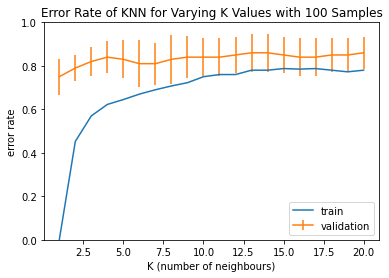

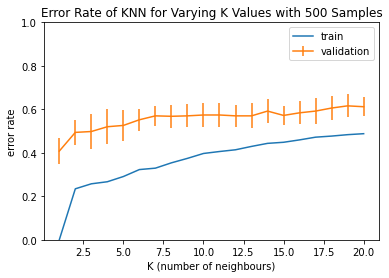

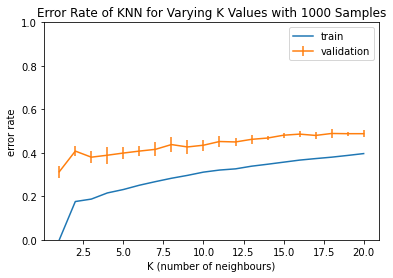

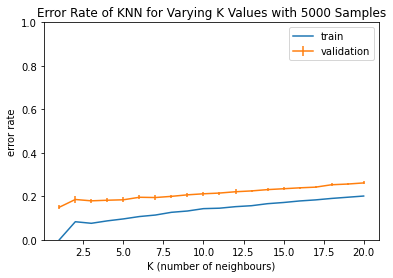

In [37]:
sizes = [100, 500, 1000, 5000, 10000]

# K range list
K_list = range(1,21)

for s in sizes:
    # select s random samples from train dataset
    x_subset, y_subset = x_train[:s,:], y_train[:s]
    
    # apply cross validation to get validation and train accuracy matrices 
    err_val_matrix, err_train_matrix = my_validation.knn_cross_validation(x_subset, y_subset, K_list, L, my_validation.error_rate)
    
    err_val_means = np.mean(err_val_matrix, axis=1)
    
    plt.title('Error Rate of KNN for Varying K Values with {size} Samples'.format(size = s))
    plt.plot(K_list, np.mean(err_train_matrix, axis=1),  label='train')
    plt.errorbar(K_list, err_val_means, np.std(err_val_matrix, axis=1), label='validation')
    plt.legend()
    plt.xlabel('K (number of neighbours)')
    plt.ylabel('error rate')
    plt.ylim(0,1)
    plt.show()

#### Use Best Parameter on Test Set

In [ ]:
model = KNeighborsClassifier(n_neighbors=best_k)
start_time = time.time()
model.fit(x_train, y_train)
tr_time = time.time() - start

y_pred = model.predict(x_test)
pred_time = time.time() - tr_time

err_rate = my_validation.error_rate(y_test, y_pred)

print("Error Rate on Test Set: {err_rate}".format(err_rate=err_rate))
print("Training time: {tr_time}".format(tr_time=tr_time))
print("Prediction time: {pred_time}".format(pred_time=pred_time))

### 2. DECISION-TREE

#### Cross-Validation

#### Sample Growing Data

#### Use Best Combination of Hyper-Parameters